In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')


In [142]:
df = pd.read_csv('data.csv')
#df.tail(5)

In [143]:
print(f"data shape {df.shape}")

data shape (6819, 96)


In [144]:
print(f"COLUMNS : \n\n{df.columns}")

COLUMNS : 

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' operating gross margin', ' realized sales gross margin',
       ' operating profit rate', ' tax Pre-net interest rate',
       ' after-tax net interest rate',
       ' non-industry income and expenditure/revenue',
       ' continuous interest rate (after tax)', ' operating expense rate',
       ' research and development expense rate', ' cash flow rate',
       ' interest-bearing debt interest rate', ' tax rate (A)',
       ' per Net Share Value (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan)',
       ' Operating Profit Per Share (Yuan)',
       ' Per Share Net profit before tax (yuan)',
       ' realized sales gross profit growth rate',
       ' operating 

In [145]:
## some columns have trailing spaces so we will remove them for better accessibility
df.rename(str.strip,inplace=True,axis='columns')
df.columns

Index(['Bankrupt?', 'ROA(C) before interest and depreciation before interest',
       'ROA(A) before interest and % after tax',
       'ROA(B) before interest and depreciation after tax',
       'operating gross margin', 'realized sales gross margin',
       'operating profit rate', 'tax Pre-net interest rate',
       'after-tax net interest rate',
       'non-industry income and expenditure/revenue',
       'continuous interest rate (after tax)', 'operating expense rate',
       'research and development expense rate', 'cash flow rate',
       'interest-bearing debt interest rate', 'tax rate (A)',
       'per Net Share Value (B)', 'Net Value Per Share (A)',
       'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons',
       'Cash Flow Per Share', 'Revenue Per Share (Yuan)',
       'Operating Profit Per Share (Yuan)',
       'Per Share Net profit before tax (yuan)',
       'realized sales gross profit growth rate',
       'operating profit growth rate', 'after-tax net p

<h4> Checking null values

In [146]:
## columns with null values
null_cols = [col for col in df.columns if df[col].isnull().sum()>0]

if(len(null_cols) == 0):
  print("No null values")
else:
  for col in null_cols:
    p = df[col].isnull().sum()/df[col].size
    print(f"{round(p*100,2)}% of null values in '{col}'")

No null values


Visualizing the missing values

<AxesSubplot: >

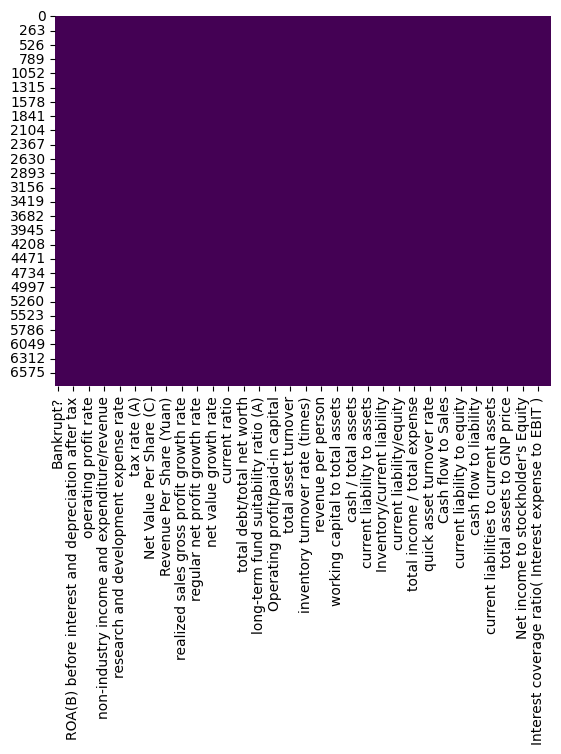

In [147]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [148]:
unique_dtypes = list(np.unique(list(df.dtypes.to_dict().values())))
print("all data types : ",unique_dtypes)

all data types :  [dtype('int64'), dtype('float64')]


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Bankrupt?                                                            6819 non-null   int64  
 1   ROA(C) before interest and depreciation before interest              6819 non-null   float64
 2   ROA(A) before interest and % after tax                               6819 non-null   float64
 3   ROA(B) before interest and depreciation after tax                    6819 non-null   float64
 4   operating gross margin                                               6819 non-null   float64
 5   realized sales gross margin                                          6819 non-null   float64
 6   operating profit rate                                                6819 non-null   float64
 7   tax Pr

In [150]:
df.describe()

Bankrupt?  ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000         
mean      0.032263                                           0.505180         
std       0.176710                                           0.060686         
min       0.000000                                           0.000000         
25%       0.000000                                           0.476527         
50%       0.000000                                           0.502706         
75%       0.000000                                           0.535563         
max       1.000000                                           1.000000         

       ROA(A) before interest and % after tax  \
count                             6819.000000   
mean                                 0.558625   
std                                  0.065620   
min                                  0.000000   
25%                                  0.535543   
50%                                  0.559802   
75%                                  0.589157   
max                                  1.000000   

       ROA(B) before interest and depreciation after tax  \
count                                        6819.000000   
mean                                            0.553589   
std                                             0.061595   
min                                             0.000000   
25%                                             0.527277   
50%                                             0.552278   
75%                                             0.584105   
max                                             1.000000   

       operating gross margin  realized sales gross margin  \
count             6819.000000                  6819.000000   
mean                 0.607948                     0.607929   
std                  0.016934                     0.016916   
min                  0.000000                     0.000000   
25%                  0.600445                     0.600434   
50%                  0.605997                     0.605976   
75%                  0.613914                     0.613842   
max                  1.000000                     1.000000   

       operating profit rate  tax Pre-net interest rate  \
count            6819.000000                6819.000000   
mean                0.998755                   0.797190   
std                 0.013010                   0.012869   
min                 0.000000                   0.000000   
25%                 0.998969                   0.797386   
50%                 0.999022                   0.797464   
75%                 0.999095                   0.797579   
max                 1.000000                   1.000000   

       after-tax net interest rate  \
count                  6819.000000   
mean                      0.809084   
std                       0.013601   
min                       0.000000   
25%                       0.809312   
50%                       0.809375   
75%                       0.809469   
max                       1.000000   

       non-industry income and expenditure/revenue  ...  \
count                                  6819.000000  ...   
mean                                      0.303623  ...   
std                                       0.011163  ...   
min                                       0.000000  ...   
25%                                       0.303466  ...   
50%                                       0.303525  ...   
75%                                       0.303585  ...   
max                                       1.000000  ...   

       net income to total assets  total assets to GNP price  \
count                 6819.000000               6.819000e+03   
mean                     0.807760               1.862942e+07   
std                      0.040332               3.764501e+08   
min                      0.000000               0.000000e+00   
25%                      0.7

**Basic EDA**

<AxesSubplot: xlabel='Bankrupt?', ylabel='count'>

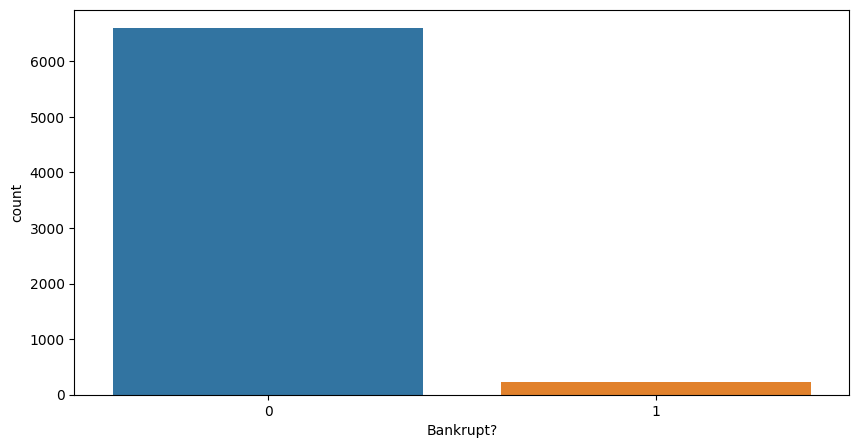

In [153]:
plt.figure(figsize=(10,5))
sns.countplot(x='Bankrupt?',data=df)

<AxesSubplot: >

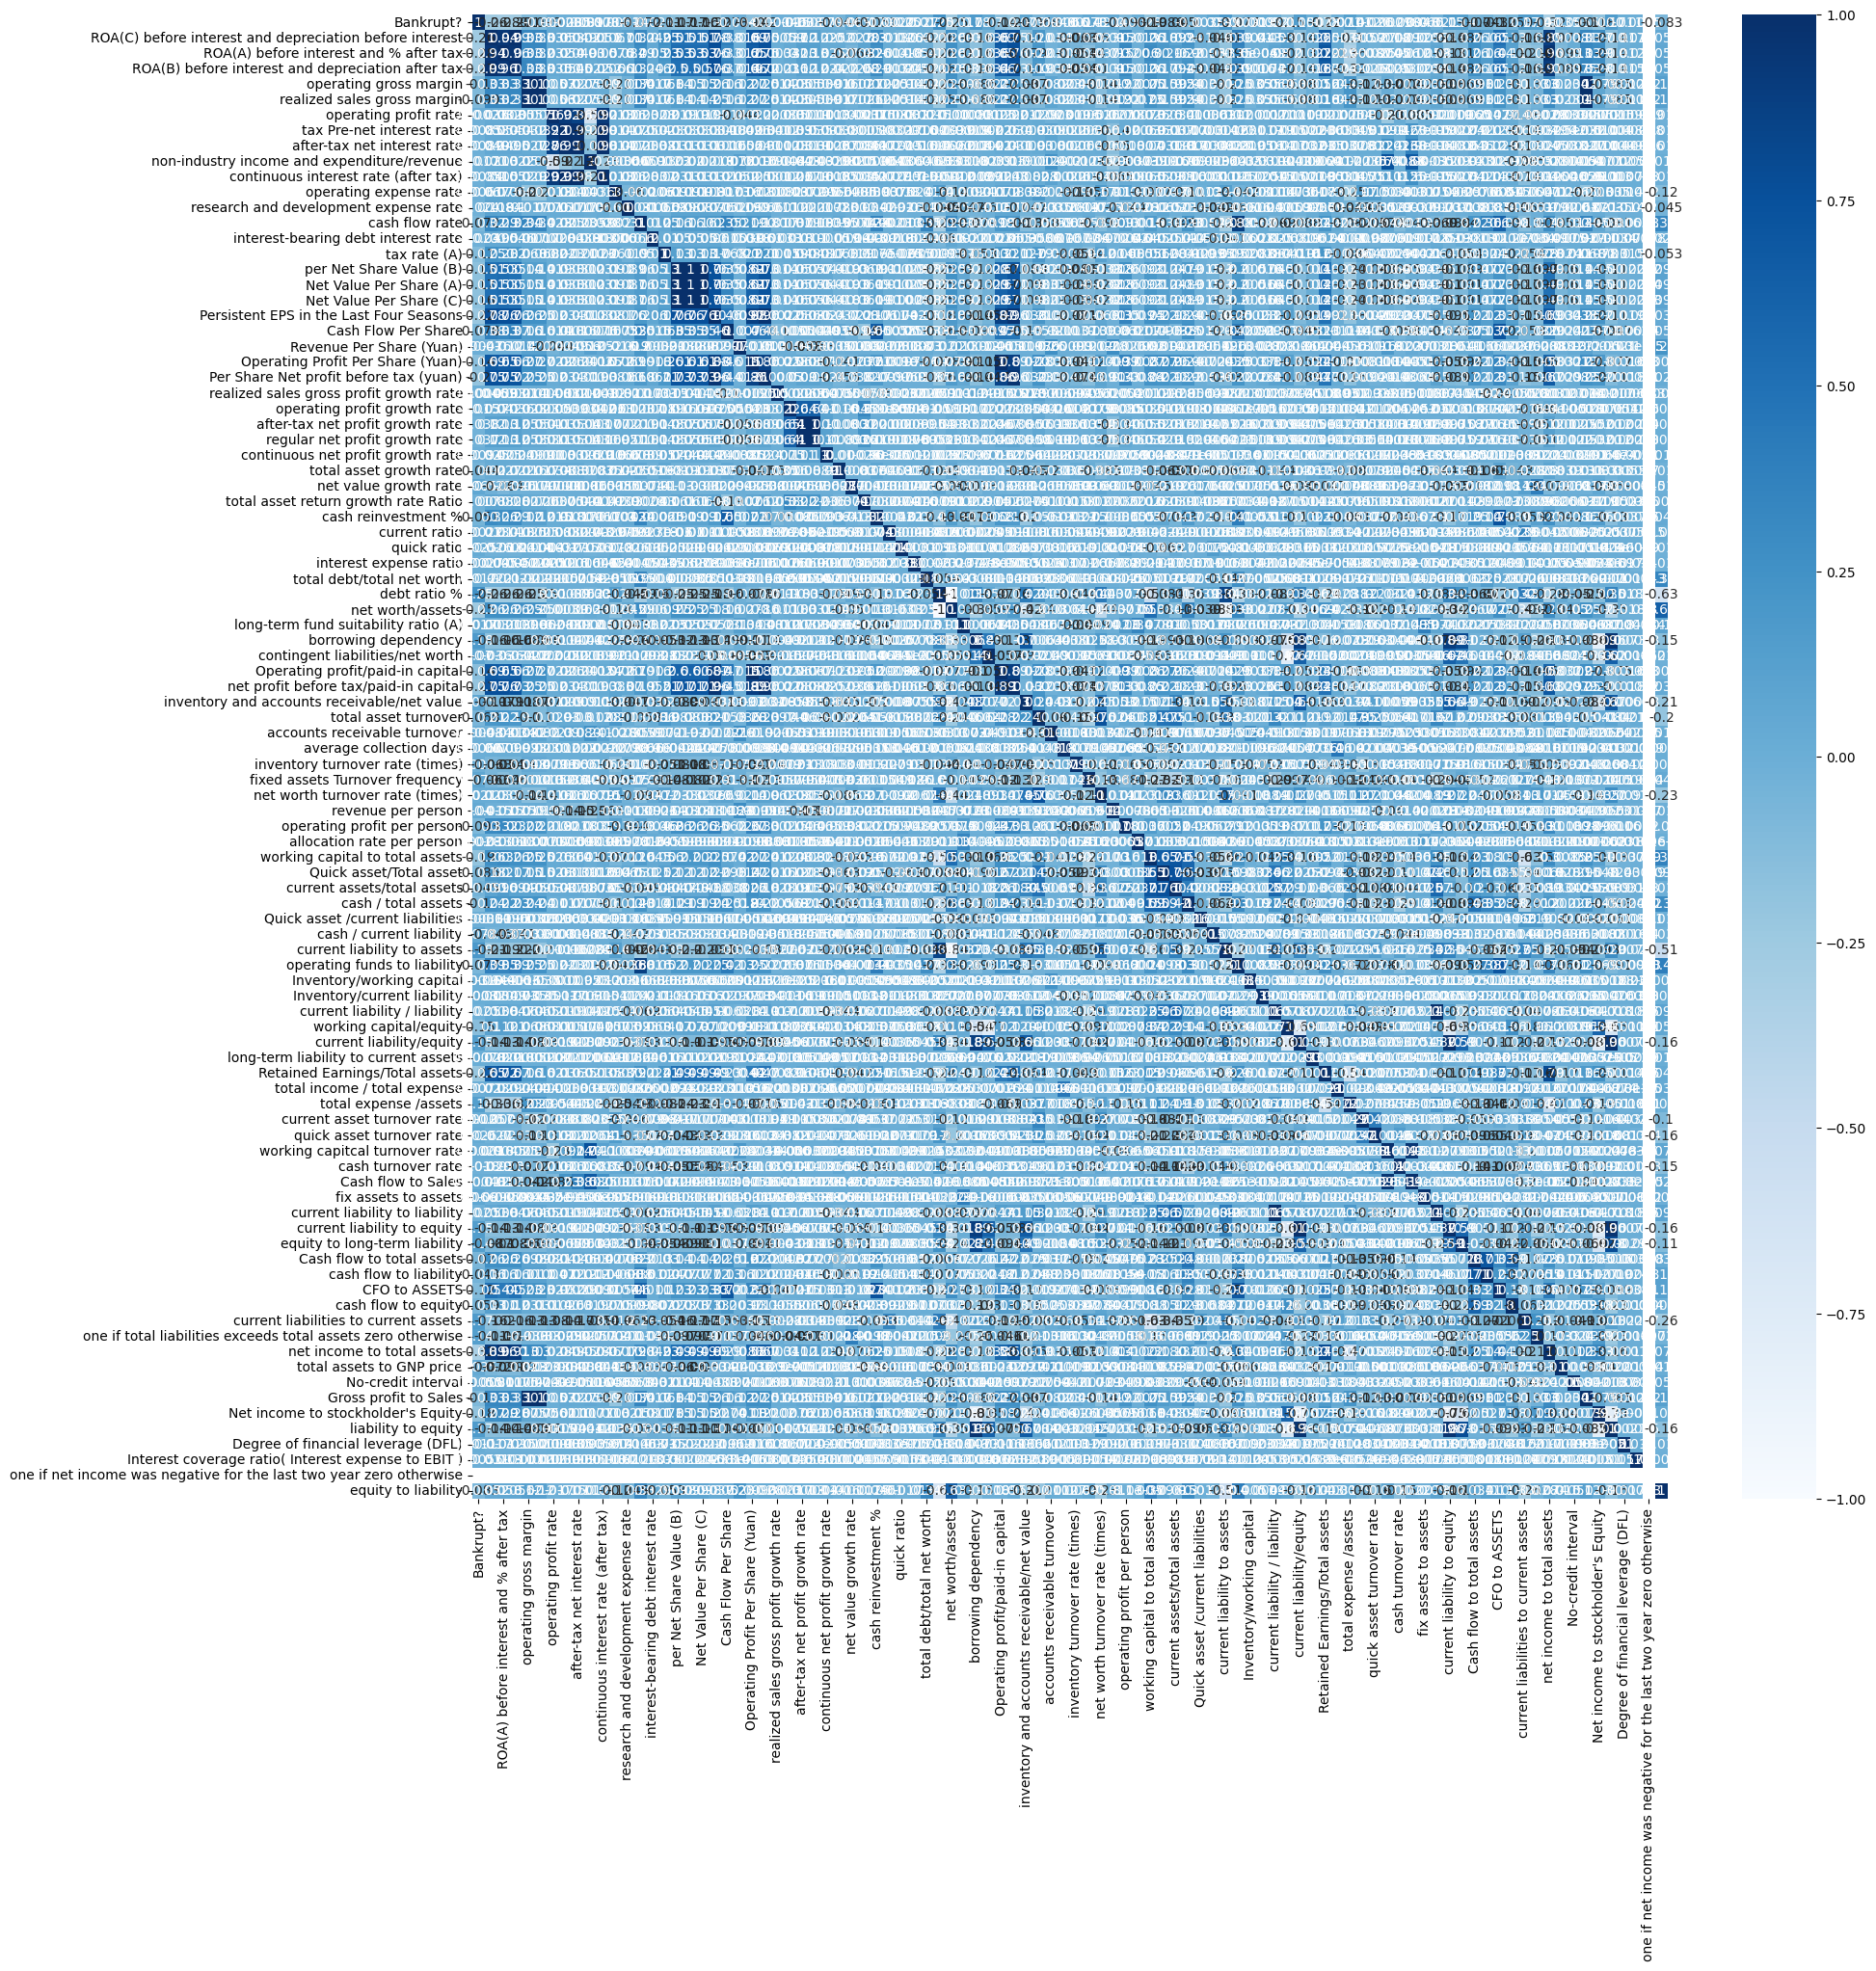

In [154]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

Since the correlation matrix is to big to interpert due to the high number of variables we will try to plot variables that we think that it strongly contribute to the target values like  "cash reinvestment %" for exemple 

<AxesSubplot: >

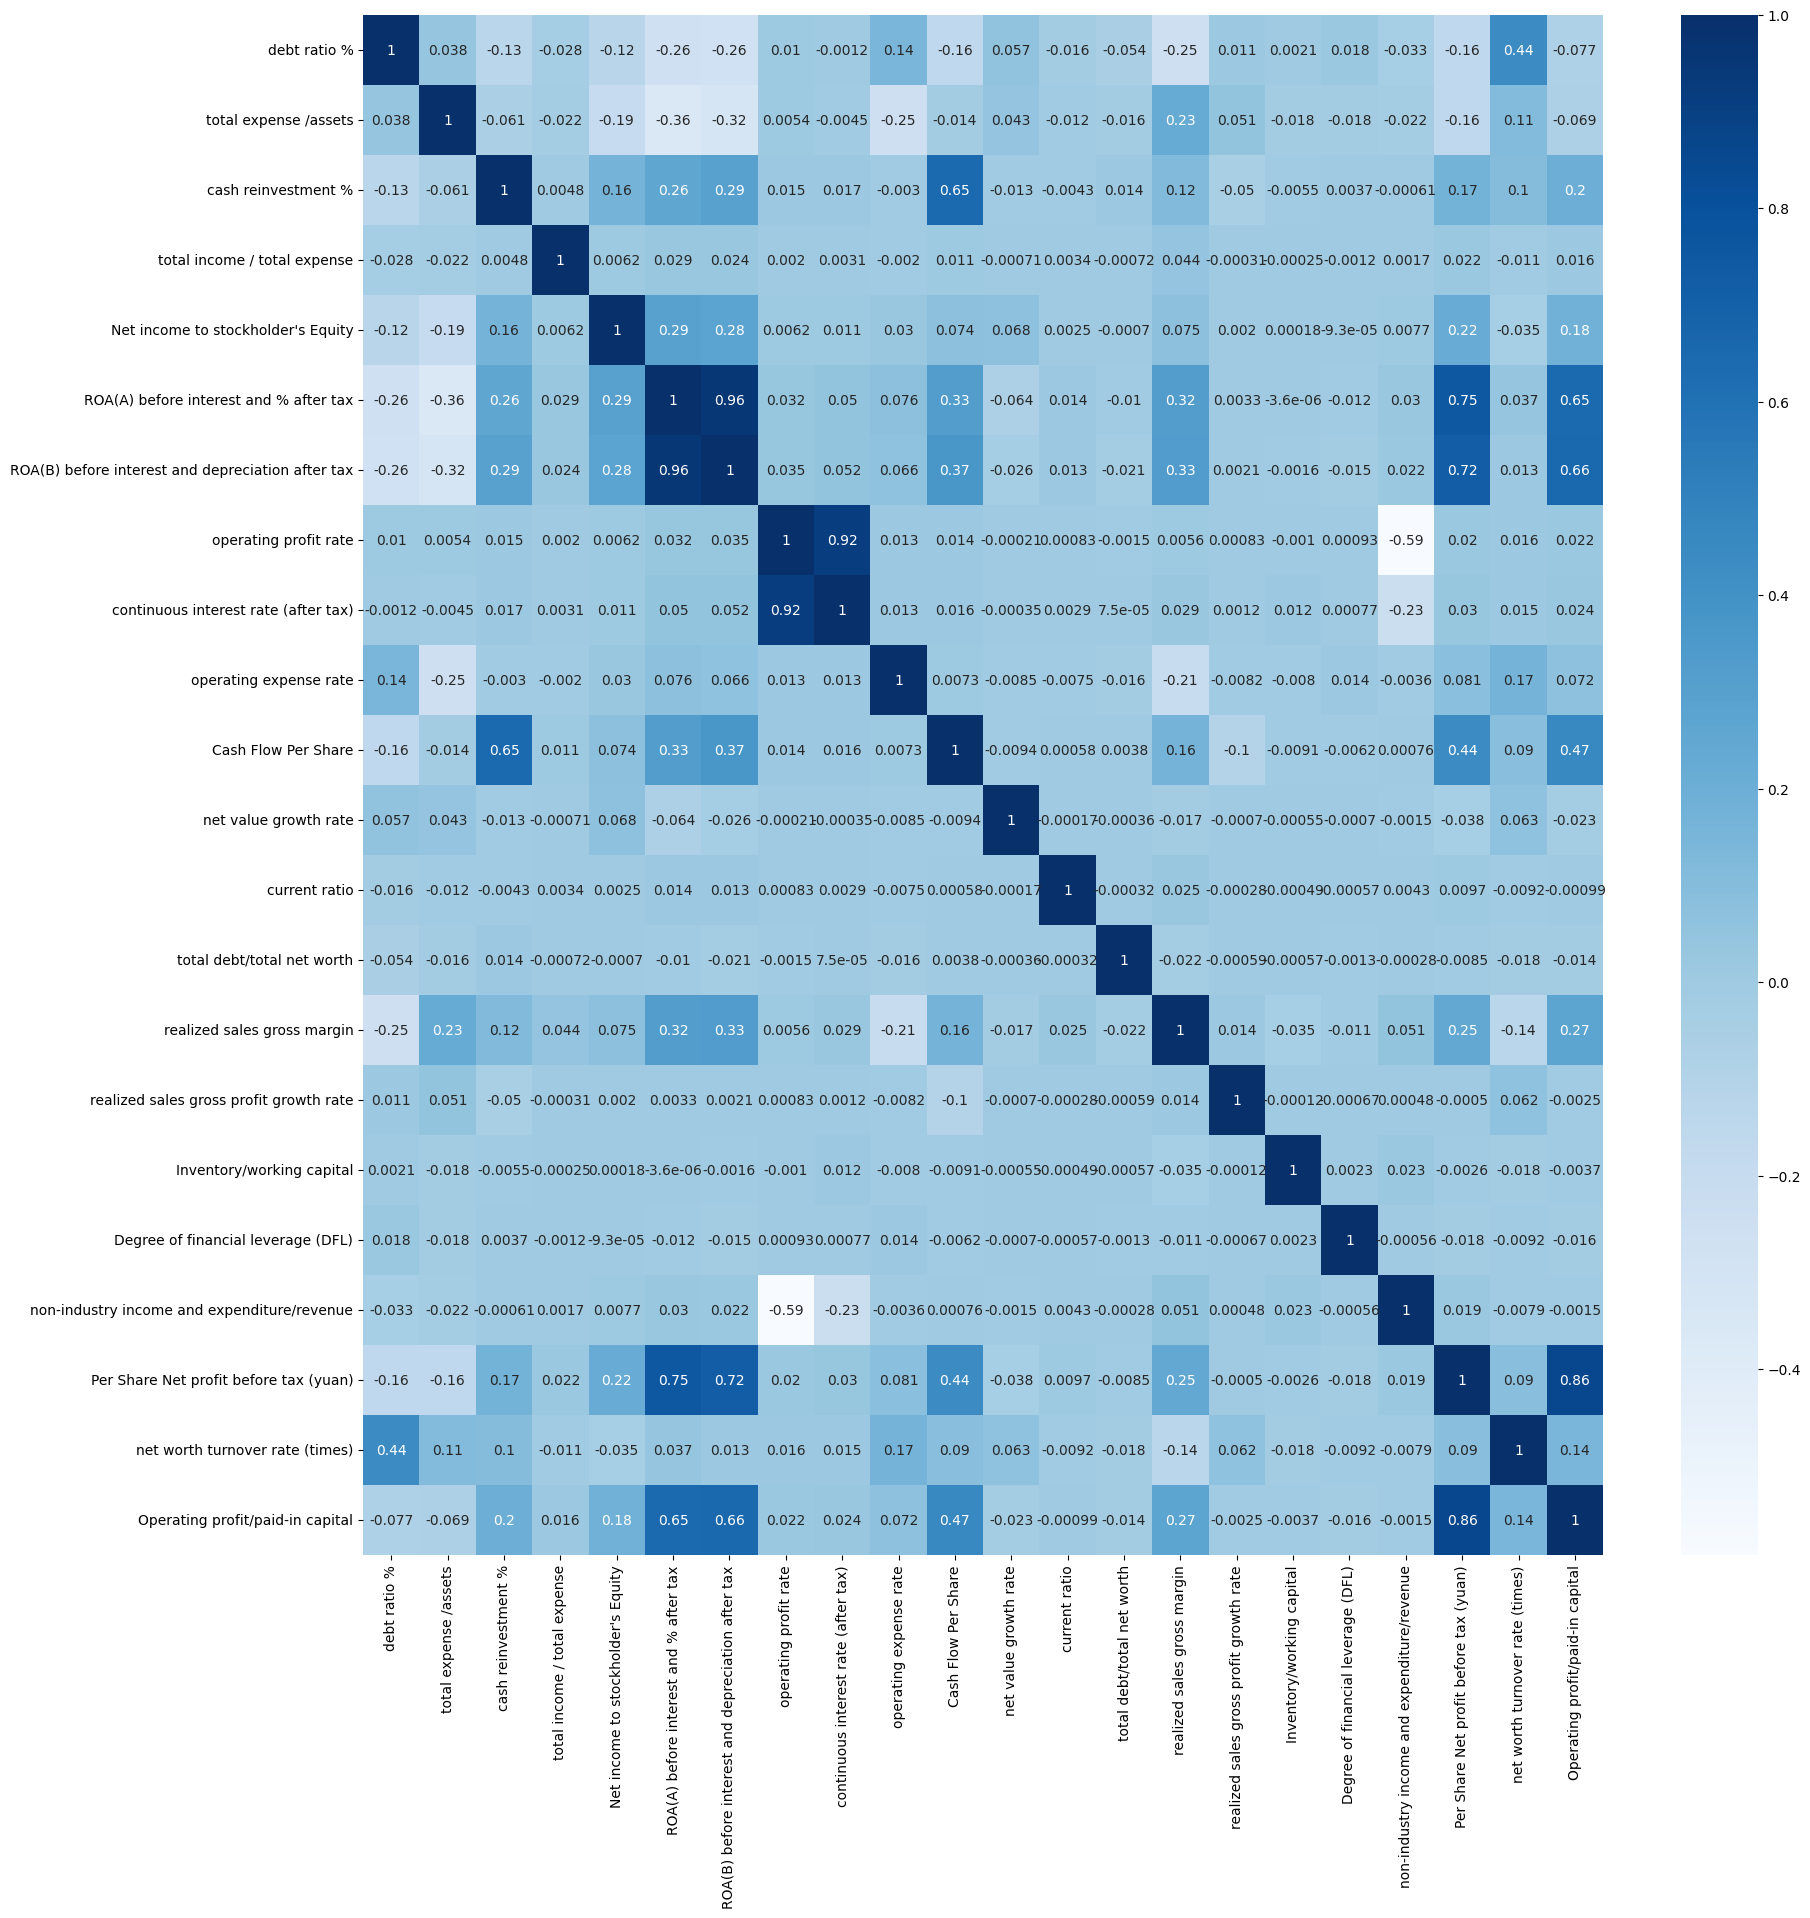

In [155]:
cols = [
        'debt ratio %',
        'total expense /assets',
        'cash reinvestment %',
        'total income / total expense',
        "Net income to stockholder's Equity",
        'ROA(A) before interest and % after tax',
        'ROA(B) before interest and depreciation after tax',
        'operating profit rate',
        'continuous interest rate (after tax)',
        'operating expense rate',
        'Cash Flow Per Share',
        'net value growth rate',
        'current ratio',
        'total debt/total net worth',
        'realized sales gross margin',
        'realized sales gross profit growth rate',
        'Inventory/working capital',
        'Degree of financial leverage (DFL)',
        'non-industry income and expenditure/revenue',
        'Per Share Net profit before tax (yuan)',
        'net worth turnover rate (times)',
        'Operating profit/paid-in capital',
        
        ]

plt.figure(figsize=(20,20))
sns.heatmap(df[cols].corr(),cbar=True,annot=True,cmap='Blues')

**Bankrupt companies analysis**

In [156]:
print("number of bankrupt companies : ",df.loc[df['Bankrupt?'] == 1].shape[0]," out of ", df.shape[0]," in the dataset")

number of bankrupt companies :  220  out of  6819  in the dataset


retrieving companies that went bankrupt

In [157]:
df_br = df.loc[df['Bankrupt?'] == 1] ## df of bankrupt companies 
df_br.shape

(220, 96)

plotting variables that we think it contribute the most the bankruptcy

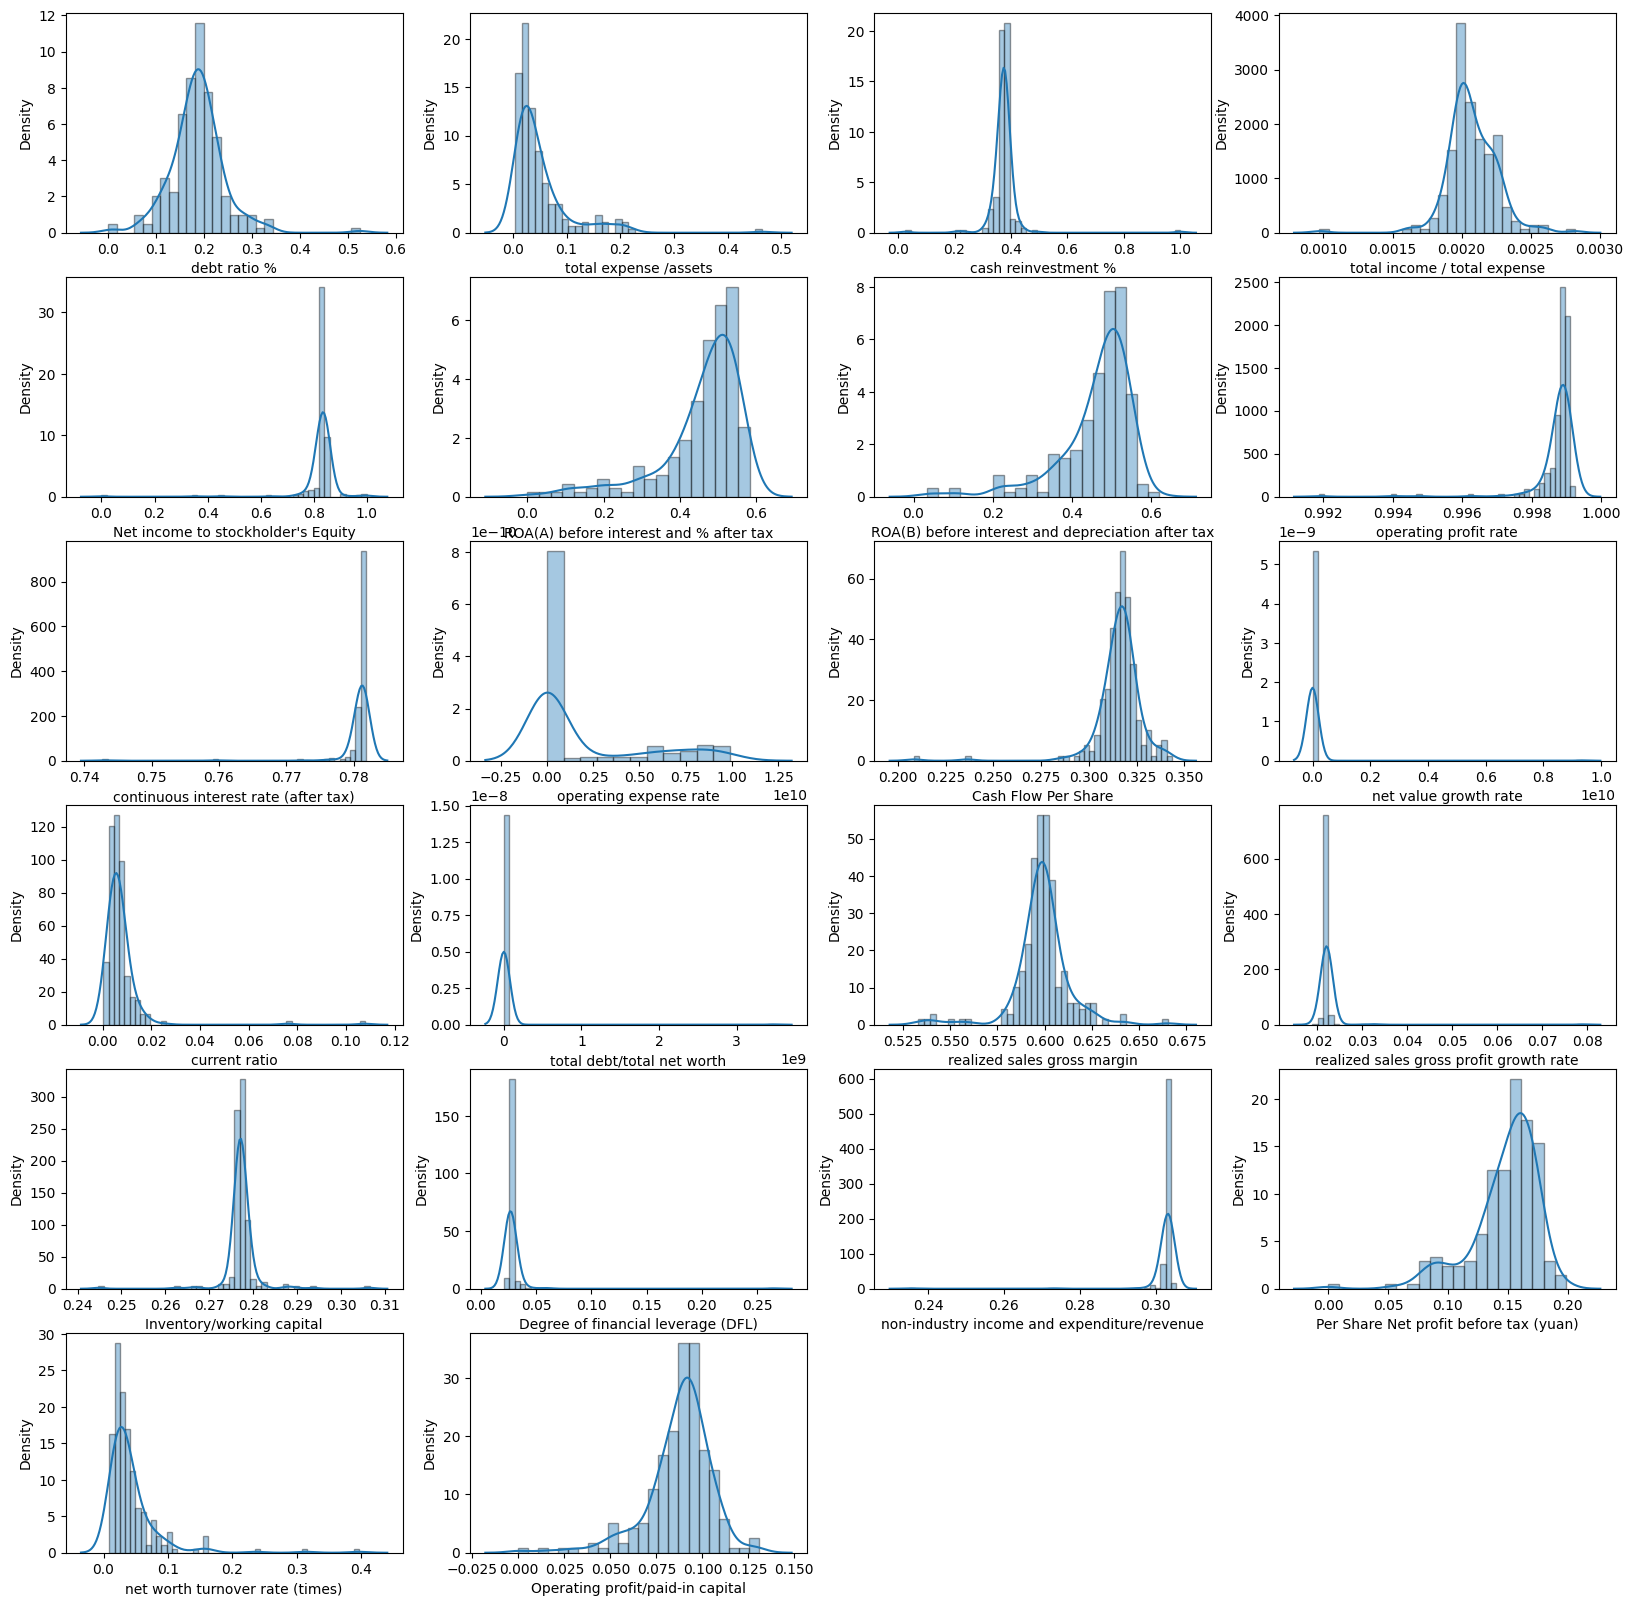

In [158]:
plt.figure(figsize=(20,20))
for i, column in enumerate(cols, 1):
    plt.subplot(6,4,i)
    #plt.hist(df_br[column],kde=True)
    sns.distplot(df_br[column],hist_kws={"edgecolor": 'black'})

spotting outliers in bankrupt companies

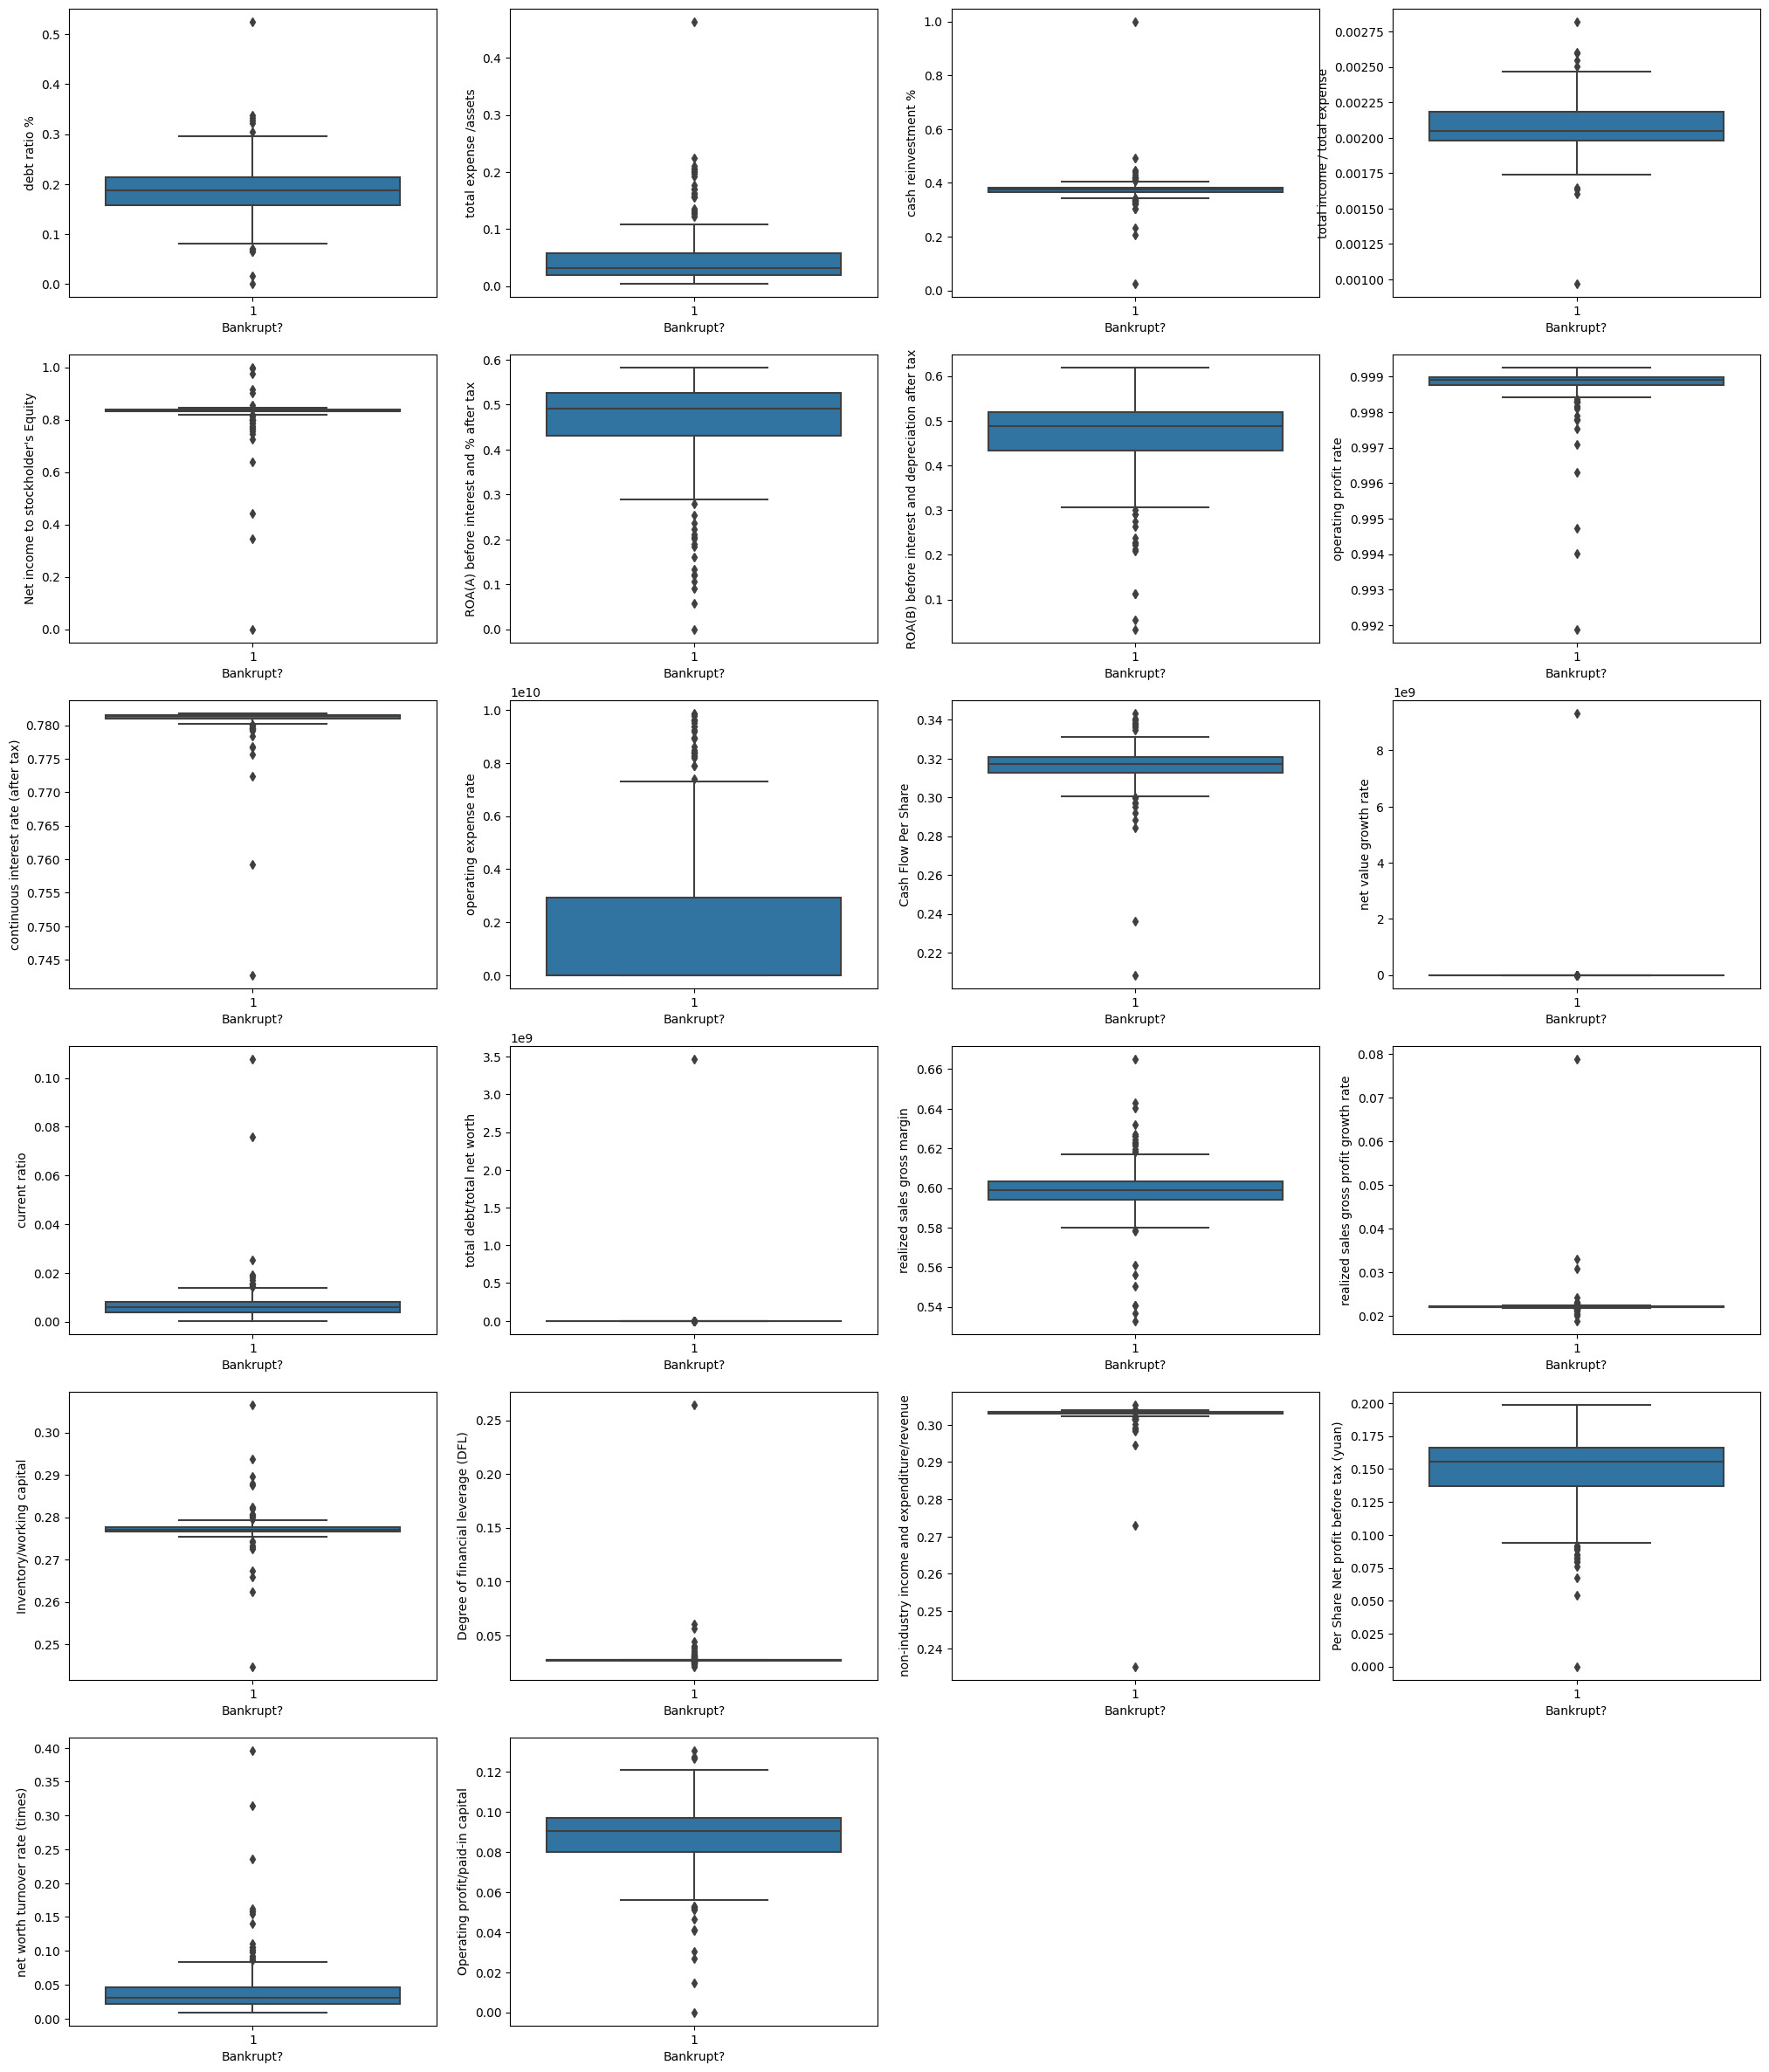

In [159]:
df_tmp = df_br
plt.figure(figsize=(25,30))
for i, column in enumerate(cols, 1):
    plt.subplot(6,4,i)
    sns.boxplot(y=df_tmp[column],x=df_tmp['Bankrupt?'])
    


**Creating a bankruptcy classifier ..** 
  1. With the entire data set with all the features 
  2. With selectKBest (feature selection with chi2, f_classif, mutual_info_classif..) 
  3. With under samping since the dataset is unbalanced


#### 1. With the entire data set with all the features
* Logistic Regression
* K-Nearest Neighbors
* Decision Tree 
* LinearSVC
* RbfSVC
* Neural Network
* Gradient Boostingoriginal_results.append(result)LinearSVC



In [160]:
X=df.drop('Bankrupt?',axis=1)
y=np.array(df['Bankrupt?']).reshape(-1,1)

X.drop('one if net income was negative for the last two year zero otherwise', axis=1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=1)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)
print(f"train data {X_train.shape}  Test data {y_train.shape}")

train data (5455, 94)  Test data (5455, 1)


In [164]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Knn": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "LinearSVC": LinearSVC(),
    "RbfSVC": SVC(),
    "Neural Network": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}


def train(models):
    for name, model in models.items():
        print(f"training {name}....  ",end="")
        model.fit(X_train,y_train)
        print("done.")
    print(30*"-")
    print("Trained all models.")

In [165]:
train(models)

training Logistic Regression....  done.
training Knn....  done.
training Decision Tree....  done.
training LinearSVC....  done.
training RbfSVC....  done.
training Neural Network....  done.
training Random Forest....  done.
training Gradient Boosting....  done.
------------------------------
Trained all models.


<h5> Scores

In [166]:
res_1 = []
for name,model in models.items():
    score=model.score(X_test,y_test)
    res_1.append(score)
    print(f"{name} : {100*score:.2f}%")

Logistic Regression : 96.48%
Knn : 96.19%
Decision Tree : 95.09%
LinearSVC : 96.26%
RbfSVC : 96.41%
Neural Network : 96.19%
Random Forest : 96.41%
Gradient Boosting : 96.63%


#### 2. With selectKBest (feature selection with chi2, f_classif, mutual_info_classif..) 

In [167]:
from sklearn.feature_selection import SelectKBest, chi2

df_ = df.copy()
X = df.drop('Bankrupt?',axis=1)
y = np.array(df['Bankrupt?']).reshape(-1,1)

## selecting 20 diffrent features with chi2 method
X=SelectKBest(score_func=chi2,k=30).fit_transform(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=1)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

print(f"train data {X_train.shape}  Test data {y_train.shape}")

train data (5455, 30)  Test data (5455, 1)


In [168]:
train(models)

training Logistic Regression....  done.
training Knn....  done.
training Decision Tree....  done.
training LinearSVC....  done.
training RbfSVC....  done.
training Neural Network....  done.
training Random Forest....  done.
training Gradient Boosting....  done.
------------------------------
Trained all models.


In [169]:
res_2 = []
for name,model in models.items():
    score=model.score(X_test,y_test)
    res_2.append(score)
    print(f"{name} : {100*score:.2f}%")

Logistic Regression : 96.19%
Knn : 96.33%
Decision Tree : 95.45%
LinearSVC : 96.41%
RbfSVC : 96.33%
Neural Network : 96.19%
Random Forest : 96.04%
Gradient Boosting : 96.04%


In [170]:
report = {
    "with all features" : res_1,
    "with features selection" : res_2
}

report 

{'with all features': [0.9648093841642229,
  0.9618768328445748,
  0.9508797653958945,
  0.9626099706744868,
  0.9640762463343109,
  0.9618768328445748,
  0.9640762463343109,
  0.966275659824047],
 'with features selection': [0.9618768328445748,
  0.9633431085043989,
  0.9545454545454546,
  0.9640762463343109,
  0.9633431085043989,
  0.9618768328445748,
  0.9604105571847508,
  0.9604105571847508]}

In [171]:
df_report = pd.DataFrame(index=models.keys() , data=report)

<AxesSubplot: title={'center': 'accuracy report'}>

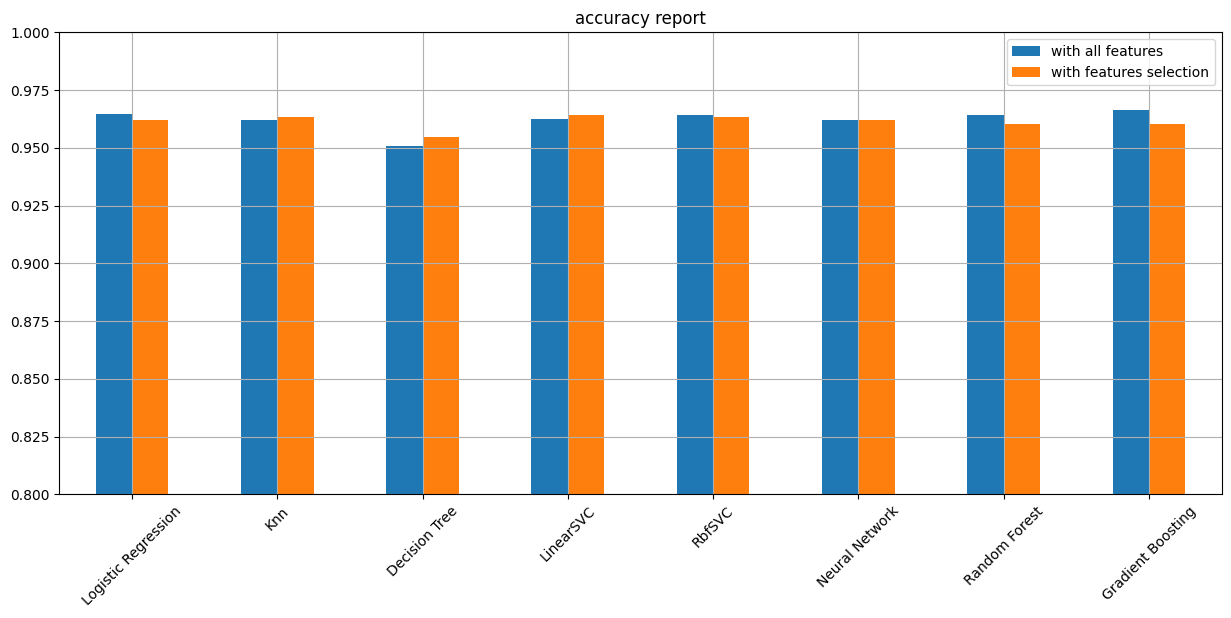

In [172]:
df_report.plot(kind='bar',
               title = "accuracy report",
               ylim = ([0.8,1.0]),
               figsize = (15,6),
               rot = 45,
               grid=True,
               stacked=False
              )
